# Estudio COVID-19
Objetivo de este notebook:
- Diferencias entre datasets: Min de Salud vs. COVID Stats AR

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

En esta sección se hará una comparación de los [datos del ministerio de salud de argentina](http://datos.salud.gob.ar/dataset/covid-19-casos-registrados-en-la-republica-argentina) y los [datos de COVID Stats AR](https://covidstats.com.ar/exportar). Los link a los datos se encuentran hipervinculados en azul.

In [2]:
path_dataset_ministerio = '/home/franco/Documentos/Python/Clones/republica-liberal/COVID-19_Ar/datasetsCovid/Covid19Casos-25-09.csv'

path_dataset_statsar = '/home/franco/Documentos/Python/Clones/republica-liberal/COVID-19_Ar/datasetsCovid/DsNación-General-2020-09-25.csv'

df_statsar = pd.read_csv(path_dataset_statsar)
df_ministerio= pd.read_csv(path_dataset_ministerio)

Veamos como esta compuesto el dataset deL ministerio de salud de la nación.

In [3]:
df_ministerio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1841199 entries, 0 to 1841198
Data columns (total 25 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   id_evento_caso                    int64  
 1   sexo                              object 
 2   edad                              float64
 3   edad_años_meses                   object 
 4   residencia_pais_nombre            object 
 5   residencia_provincia_nombre       object 
 6   residencia_departamento_nombre    object 
 7   carga_provincia_nombre            object 
 8   fecha_inicio_sintomas             object 
 9   fecha_apertura                    object 
 10  sepi_apertura                     int64  
 11  fecha_internacion                 object 
 12  cuidado_intensivo                 object 
 13  fecha_cui_intensivo               object 
 14  fallecido                         object 
 15  fecha_fallecimiento               object 
 16  asistencia_respiratoria_mecanica  ob

In [4]:
df_ministerio

,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,...,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion
0,1000000,M,53.0,Años,Argentina,CABA,SIN ESPECIFICAR,Buenos Aires,NaN,2020-06-01,...,NaN,NO,6,Privado,Caso Descartado,Descartado,2,2020-06-09,0,2020-09-25
1,1000002,M,21.0,Años,Argentina,Buenos Aires,La Matanza,Buenos Aires,NaN,2020-06-01,...,NaN,NO,6,Público,Caso Descartado,Descartado,6,2020-06-01,427,2020-09-25
2,1000003,F,40.0,Años,Argentina,Córdoba,Capital,Córdoba,2020-05-24,2020-06-01,...,NaN,NO,14,Privado,Caso Descartado,Descartado,14,2020-06-01,14,2020-09-25
3,1000005,F,58.0,Años,Argentina,Mendoza,Las Heras,Mendoza,NaN,2020-06-01,...,NaN,NO,50,Público,Caso Descartado,Descartado,50,2020-06-01,49,2020-09-25
4,1000006,M,28.0,Años,Argentina,Buenos Aires,Malvinas Argentinas,Buenos Aires,2020-05-30,2020-06-01,...,NaN,NO,6,Público,Caso sospechoso - Con muestra sin resultado,Sospechoso,6,NaN,515,2020-09-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1841194,999994,M,39.0,Años,Argentina,Tierra del Fuego,Río Grande,Tierra del Fuego,NaN,2020-06-01,...,NaN,NO,94,Público,Caso Descartado,Descartado,94,2020-06-01,7,2020-09-25
1841195,999995,M,33.0,Años,Argentina,Formosa,Pilcomayo,Formosa,NaN,2020-06-01,...,NaN,NO,34,Público,Caso confirmado por laboratorio - No Activo po...,Confirmado,34,2020-06-12,49,2020-09-25
1841196,999996,M,42.0,Años,Argentina,CABA,SIN ESPECIFICAR,CABA,NaN,2020-06-01,...,NaN,NO,2,Privado,Caso Descartado,Descartado,2,2020-06-01,0,2020-09-25
1841197,999997,F,30.0,Años,Argentina,CABA,SIN ESPECIFICAR,Córdoba,NaN,2020-06-01,...,NaN,NO,14,Público,Caso Descartado,Descartado,2,2020-06-02,0,2020-09-25


El dataset del ministerio de la nación no se encuentra preprocesado. Son los datos en bruto y para trabajar con ellos hay que hacer transformación en el mismo. El dataset contiene 25 columnas y 1841199 entradas, al 25/09, la cual cada una corresponde al paciente diagnosticado, tenga o no confirmación de COVID. El mismo pesa 351.2 MB, un dataset pesado.


Veamos como esta compuesto el dataset de covid stats arg

In [5]:
df_statsar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   fecha               269 non-null    object
 1   fallecidos          269 non-null    int64 
 2   terapia             269 non-null    int64 
 3   casos_dx            269 non-null    int64 
 4   diagnosticos        269 non-null    int64 
 5   internados          269 non-null    int64 
 6   casos_fis           269 non-null    int64 
 7   casos_fis_ajustada  269 non-null    int64 
 8   casos_fa            269 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 19.0+ KB


In [6]:
df_statsar

,fecha,fallecidos,terapia,casos_dx,diagnosticos,internados,casos_fis,casos_fis_ajustada,casos_fa
0,2020-01-01,0,0,1,3,1,0,0,0
1,2020-01-02,0,0,0,0,0,1,1,0
2,2020-01-03,0,0,0,0,0,0,0,0
3,2020-01-04,0,0,0,0,0,0,0,0
4,2020-01-05,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
264,2020-09-21,138,38,9959,18593,278,6268,5339,9737
265,2020-09-22,135,36,11018,21368,267,6910,1343,11122
266,2020-09-23,127,25,11710,21597,167,6710,635,10893
267,2020-09-24,82,4,9727,18181,79,5355,155,8533


Los datos obtenidos de COVID Stats Ar se encuentran trabajados. Toman los datos del ministerio de salud, los procesan y los transforman. Nos entregan los datos masticados y ordenados, directo para juegar con ellos y obtener visualizaciones. El dataset es mucho mas liviano, 19.0 KB, y de facil manipular. Tiene 9 columnas y 269 entradas que corresponden al dia del año (DoY).

Cabe destacar rapidamente que el dataset obtenido de COVID Stats Ar en realidad es solo uno de los tantos que se puede descargar ya que se cuenta con filtros para obtener los datasets tratados.

Tratemos nuestros datos para empezar a trabajar mas adelante con ellos

In [8]:
# Filtro para confirmados
classFilter = (df_ministerio.clasificacion_resumen == 'Confirmado')
df_confirmados = df_ministerio.loc[classFilter]

# Seleccion de columnas para estudio
columnas_interes = ['sexo', 'edad', 'clasificacion_resumen', 'fecha_diagnostico', 'fallecido', 'fecha_fallecimiento']
df_confirmados = df_confirmados[columnas_interes]

# Cambio de formato de fecha
df_confirmados['fecha_diagnostico'] = pd.to_datetime(df_confirmados['fecha_diagnostico'], format='%Y-%m-%d')
df_confirmados['fecha_fallecimiento'] = pd.to_datetime(df_confirmados['fecha_fallecimiento'], format='%Y-%m-%d')

# Columna confirmados
df_confirmados['confirmados'] = 1
df_confirmados = df_confirmados.drop(columns=['clasificacion_resumen'])

df_confirmados = df_confirmados.reset_index().drop(columns='index')
df_ministerio_confirmado = df_confirmados

Veamos que no exista alguna disparidad entre los dataset. Observemos la cantidad de contagiados total al 25/09.

In [9]:
casos_ministerio = df_ministerio_confirmado['confirmados'].sum()
casos_fis = df_statsar['casos_fis'].sum()
casos_fis_ajustada = df_statsar['casos_fis_ajustada'].sum()
casos_fa = df_statsar['casos_fa'].sum()

casos_ministerio == casos_fis == casos_fis_ajustada == casos_fa


True

## Comparando datos

Para terminar con la comparación de los datos del Ministerio de Salud y COVID Stats Ar veamos como se encuentran distribuidos los mismos en función de la fecha, mes a mes.

Armemos nuestros datasets

In [10]:
# Datos del ministerio de salud ordenados por fecha
df_confirmados_simple = df_ministerio_confirmado[['confirmados', 'fecha_diagnostico']].groupby('fecha_diagnostico').sum()
df_confirmados_simple.reset_index(inplace=True)
df_confirmados_simple = df_confirmados_simple.drop(0) # Eliminamos dato fuera de fecha ¿2013?

# Datos de covid stats
df_confirmados_stats_simple = df_statsar[['casos_fis', 'casos_fis_ajustada', 'casos_fa', 'fecha']].groupby('fecha').sum()
df_confirmados_stats_simple.reset_index(inplace=True)

Para empezar veamos como se encuentran distribuidos los datos de contagiados con un **scatter plot**.

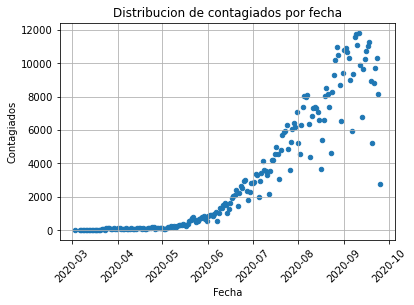

In [14]:
### Grafico de confirmados por fecha

# Tomando datos de importancia
df_confirmados_simple = df_confirmados[['confirmados', 'fecha_diagnostico']].groupby('fecha_diagnostico').sum()
df_confirmados_simple.reset_index(inplace=True)
df_confirmados_simple = df_confirmados_simple.drop(0) # Eliminamos dato fuera de fecha ¿2013?

# Ploteando datos
df_confirmados_simple.plot(kind='scatter', y='confirmados', x='fecha_diagnostico')
plt.title('Distribucion de contagiados por fecha')
plt.xticks(rotation=45)

plt.xlabel('Fecha')
plt.ylabel('Contagiados')

plt.grid(True)

Los datos en el scatter plot son de la transformación hecha por nosotros con los datos en bruto del ministerio de salud. Superpongamos los datos de COVID Stats AR en un sólo scatter.

### Confimados vs Confirmados FIS


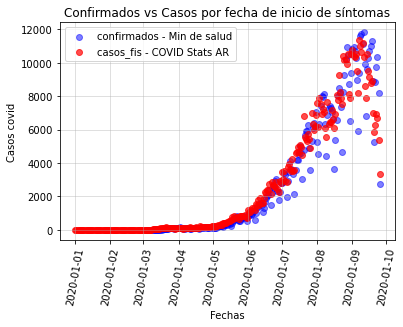

In [11]:
fig, ax = plt.subplots()

labels = df_statsar['fecha']

# Plot con datos de la nacion, fecha de diagnostico. 
ax.scatter(df_confirmados_simple['fecha_diagnostico'], 
           df_confirmados_simple['confirmados'],
           color="blue", alpha=0.5, label='confirmados - Min de salud')

# Plot con datos de covidstat, fecha de inicio de síntomas
ax.scatter(df_confirmados_stats_simple['fecha'],
           df_confirmados_stats_simple['casos_fis'],
           color="red", alpha=0.7, label='casos_fis - COVID Stats AR')

ax.set_title('Confirmados vs Casos por fecha de inicio de síntomas')
ax.set_ylabel('Casos covid')

ax.set_xticklabels(labels, rotation=80)
ax.set_xlabel('Fechas')

ax.legend()

ax.grid(True, alpha=0.5)

plt.show()

En el siguiente scatter podemos ver los datos ya procesados por COVID Stats respecto al procesamiento hecho por nosotros de los datos en bruto del ministerio. Podemos ver una distribución de contagiados en rojo y azul. La distribución de los datos en rojo corresponde a los casos por fecha de inicio de síntomas.


### Confimados vs Confirmados FA


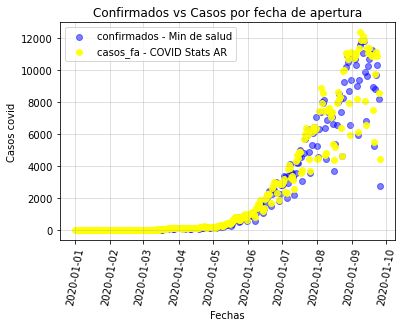

In [13]:
fig, ax = plt.subplots()

labels = df_statsar['fecha']

# Plot con datos de la nacion, fecha de diagnostico. 
ax.scatter(df_confirmados_simple['fecha_diagnostico'], 
           df_confirmados_simple['confirmados'],
           color="blue", alpha=0.5, label='confirmados - Min de salud')

# Plot con datos de covidstat, fecha de apertura.
ax.scatter(df_confirmados_stats_simple['fecha'],
           df_confirmados_stats_simple['casos_fa'],
           color="yellow", alpha=0.9, label='casos_fa - COVID Stats AR')

ax.set_title('Confirmados vs Casos por fecha de apertura')
ax.set_ylabel('Casos covid')

ax.set_xticklabels(labels, rotation=80)
ax.set_xlabel('Fechas')

ax.legend()

ax.grid(True, alpha=0.5)

plt.show()

En el siguiente scatter tenemos lo mismo de antes pero amarillo y azul. La distribución de los datos en amarillo corresponde a los casos por fecha de apertura. Esta es la distribución de datos que corresponde al día en que se cargó en la base de datos.

### Confimados vs Confirmados FIS ajustada


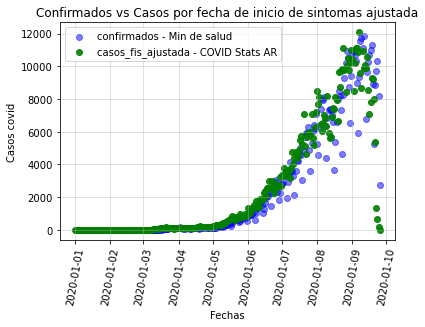

In [12]:
fig, ax = plt.subplots()

labels = df_statsar['fecha']

# Plot con datos de la nacion, fecha de diagnostico. 
ax.scatter(df_confirmados_simple['fecha_diagnostico'], 
           df_confirmados_simple['confirmados'],
           color="blue", alpha=0.5, label='confirmados - Min de salud')

# Plot con datos de covidstat, fecha de inicio de sintomas ajustada, se una (FA - 4) porque 4 días es el promedio entre FIS y FA 
ax.scatter(df_confirmados_stats_simple['fecha'],
           df_confirmados_stats_simple['casos_fis_ajustada'],
           color="green", alpha=0.9, label='casos_fis_ajustada - COVID Stats AR')

ax.set_title('Confirmados vs Casos por fecha de inicio de sintomas ajustada')
ax.set_ylabel('Casos covid')

ax.set_xticklabels(labels, rotation=80)
ax.set_xlabel('Fechas')

ax.legend()

ax.grid(True, alpha=0.5)

plt.show()

Veamos ahora la distribución en verde y azul. La distribución de los datos en verde corresponde a los casos por fecha de inicio de síntomas ajustada. Es similar a los casos fis, pero como algunos en la base de datos del ministerio de salud hay datos nulos, casos no la tienen a esta fecha. Lo que hicieron en COVID Stats es ajustarlos con la siguiente formula simple **FIS_ajustada = FA - 4**, porque 4 días es el promedio entre FIS y FA para los que la tienen.